In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


 **Univariate Analysis**

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


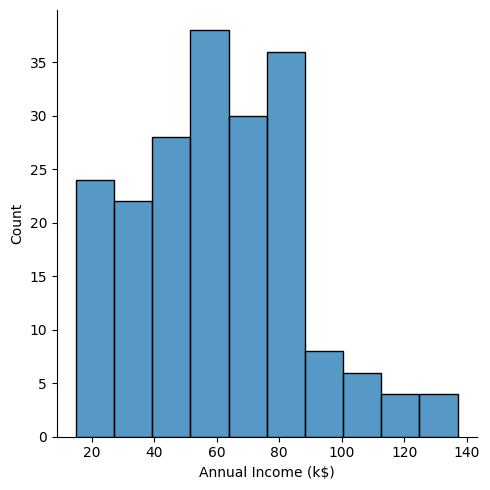

In [ ]:
sns.displot(df['Annual Income (k$)'],kde= False)

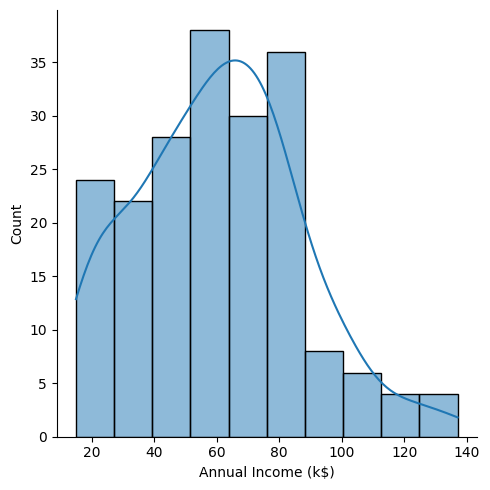

In [ ]:
sns.displot(df['Annual Income (k$)'],kde= True)

In [94]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

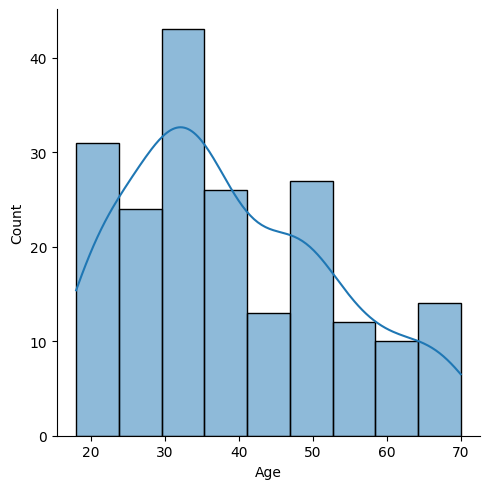

<Figure size 640x480 with 0 Axes>

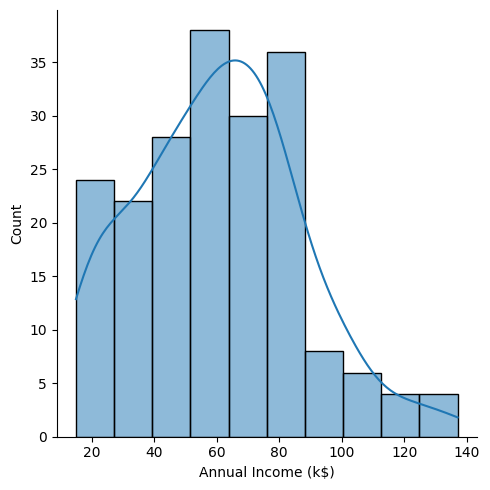

<Figure size 640x480 with 0 Axes>

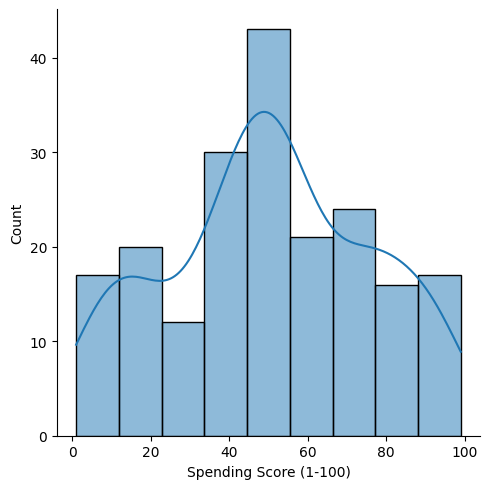

In [ ]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
  plt.figure()
  sns.displot(df[i],kde = True)

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

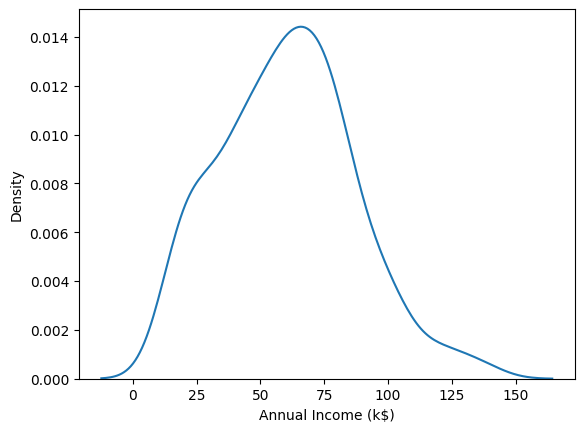

In [ ]:
sns.kdeplot(df[ 'Annual Income (k$)'])

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

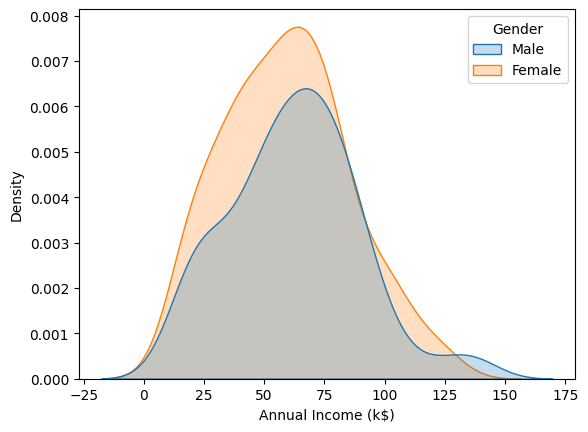

In [ ]:
sns.kdeplot(df,x='Annual Income (k$)' ,shade = True,hue='Gender')

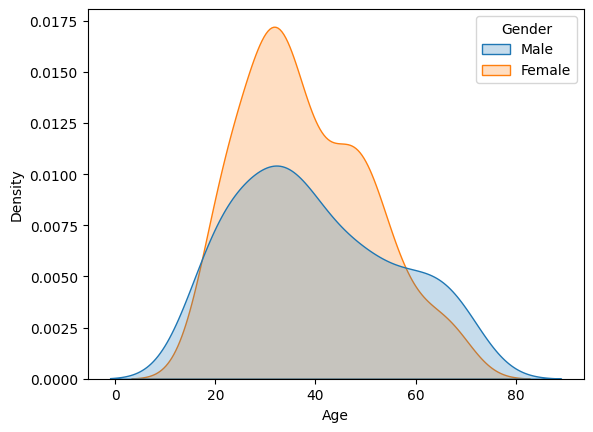

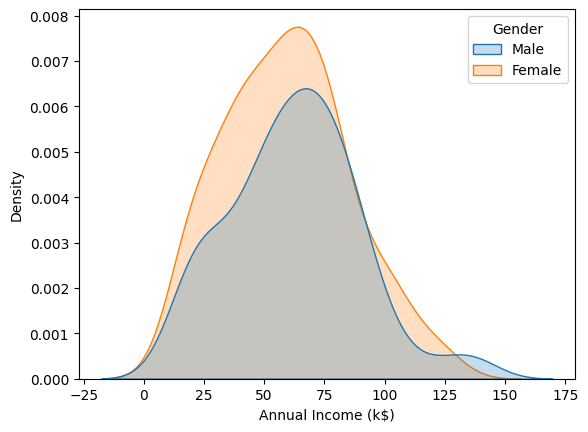

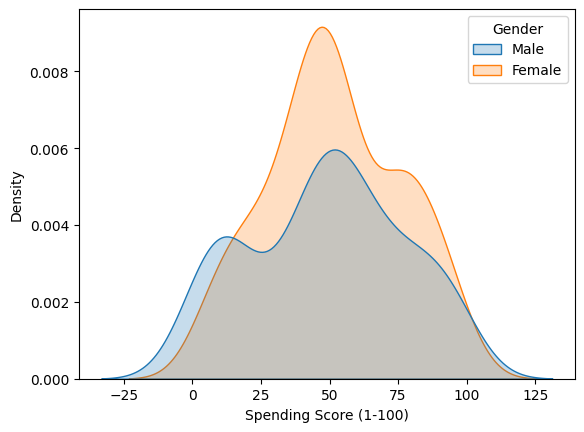

In [ ]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
  plt.figure()
  sns.kdeplot(df,x= i ,shade = True,hue='Gender')

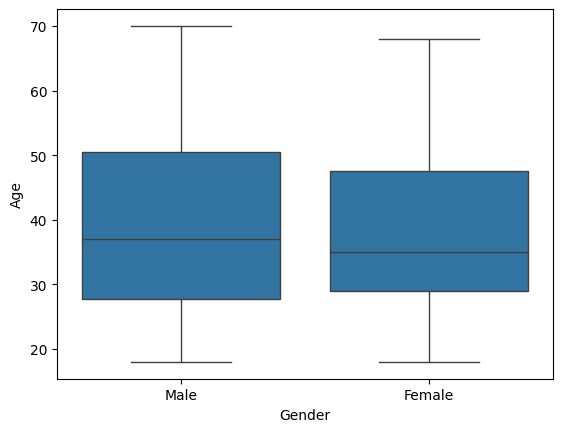

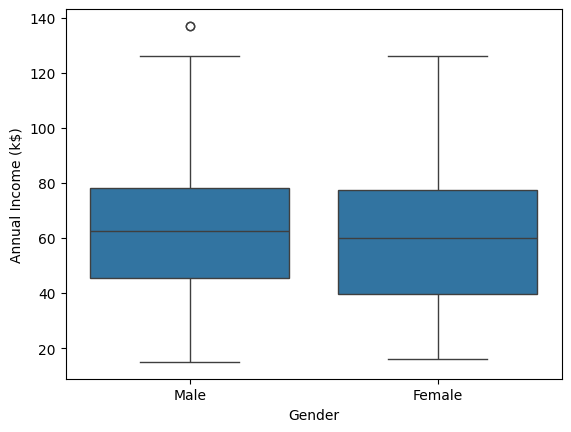

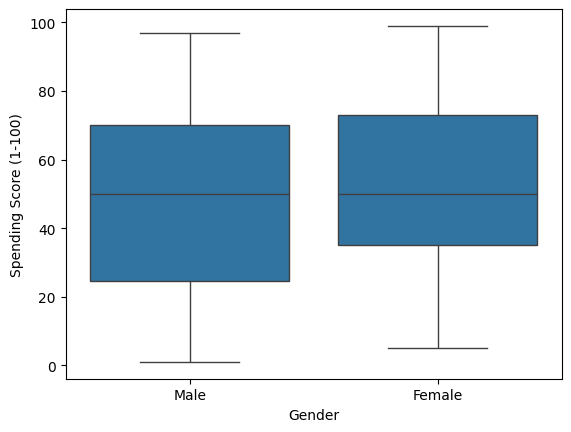

In [ ]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
  plt.figure()
  sns.boxplot(df,x='Gender',y=  i )

In [ ]:
df['Gender'].value_counts(normalize= True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

<Axes: xlabel='Gender', ylabel='count'>

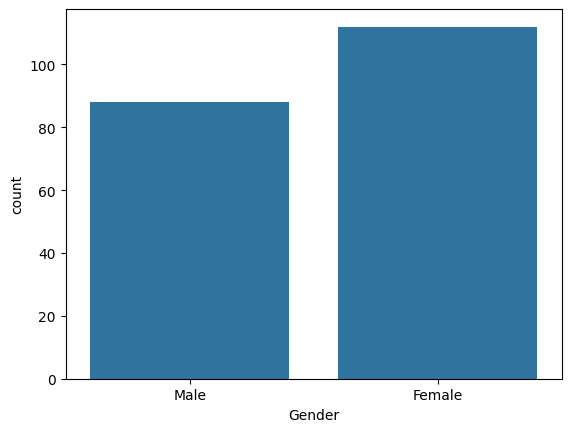

In [ ]:
sns.countplot(df,x= 'Gender')

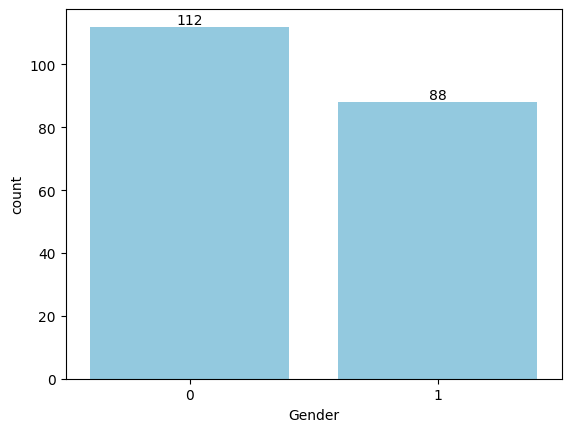

In [110]:
ax= sns.countplot(df,x= 'Gender',color='skyblue')
for bars in ax.containers:
  ax.bar_label(bars)

**Bivariate Analysis**

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

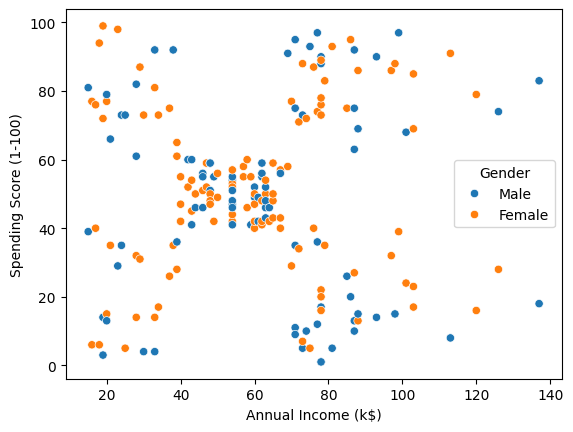

In [ ]:
sns.scatterplot(data = df, x= 'Annual Income (k$)',y = 'Spending Score (1-100)',hue = 'Gender')

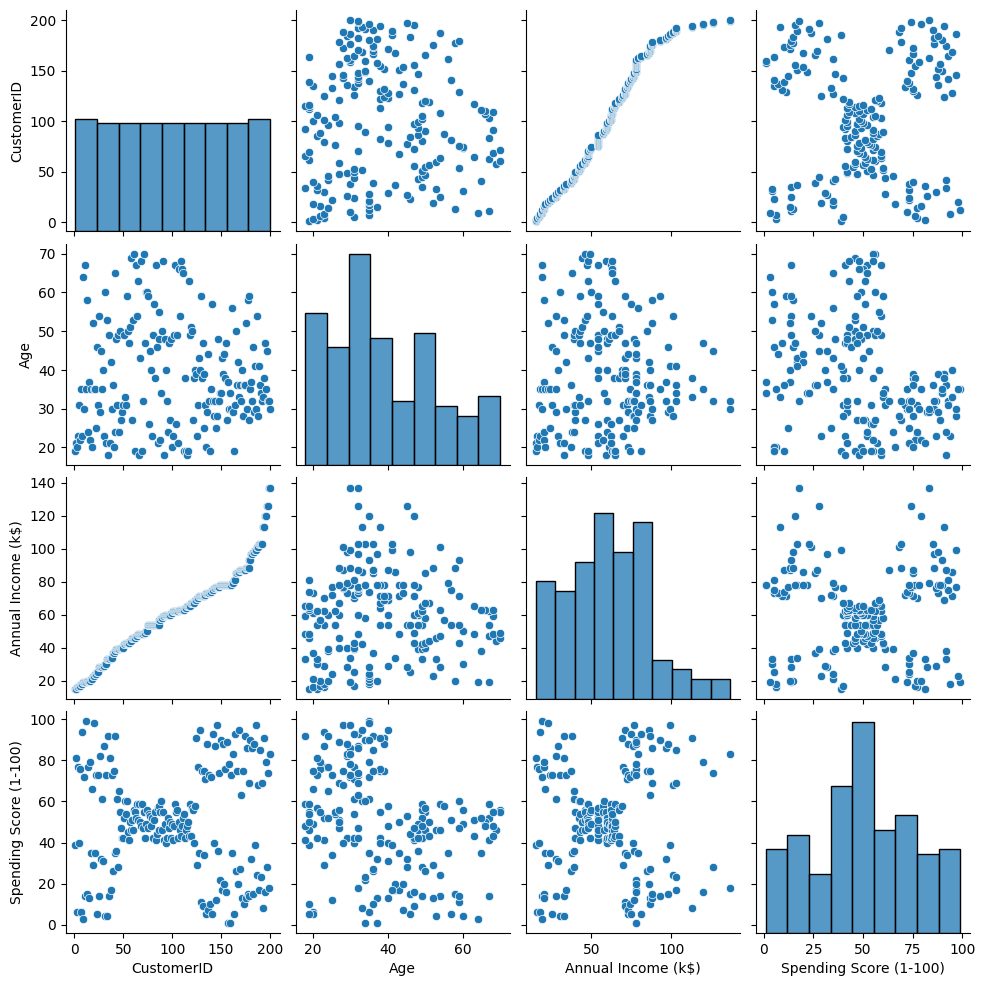

In [ ]:
sns.pairplot(df)

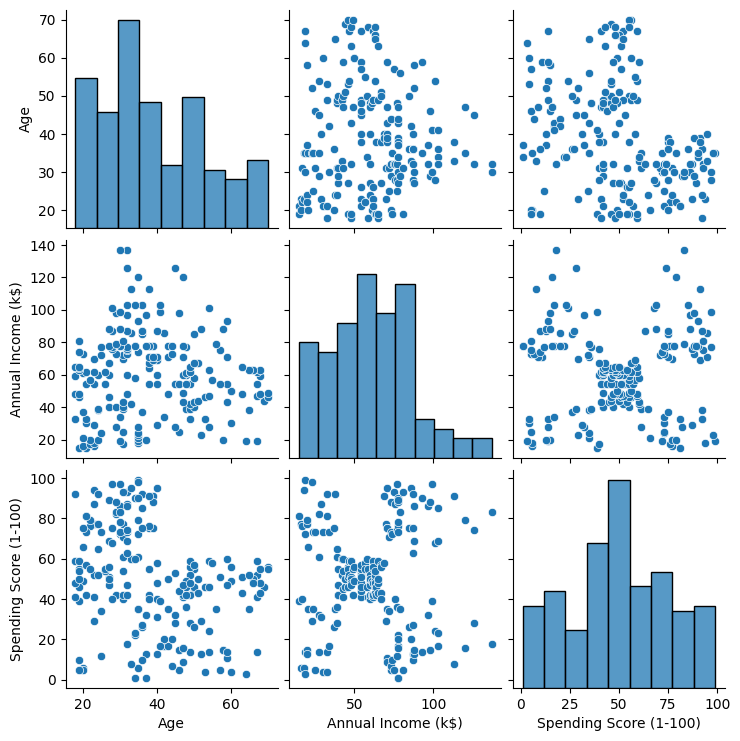

In [ ]:
df= df.drop('CustomerID',axis= 1)
sns.pairplot(df)

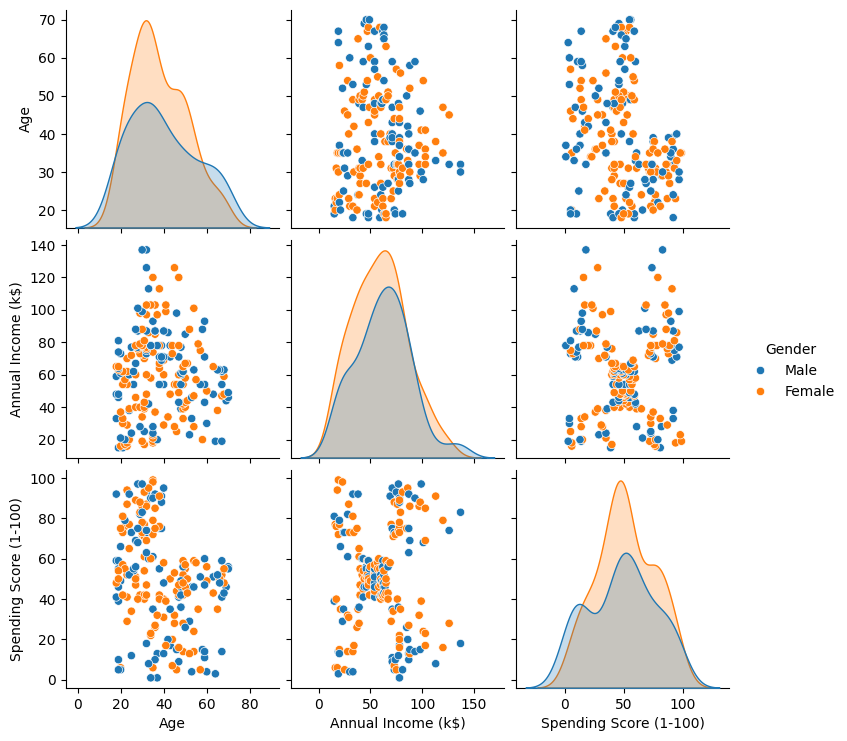

In [ ]:
sns.pairplot(df,hue= 'Gender')

In [ ]:
df.groupby(['Gender'],as_index= False)[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean().sort_values(by='Age',ascending = False)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,Male,39.806818,62.227273,48.511364
0,Female,38.098214,59.250000,51.526786


converting male and female into numeric values

In [ ]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [ ]:
df.corr()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,NaN,NaN,NaN,NaN
Age,NaN,1.000000,-0.012398,-0.327227
Annual Income (k$),NaN,-0.012398,1.000000,0.009903
Spending Score (1-100),NaN,-0.327227,0.009903,1.000000


<Axes: >

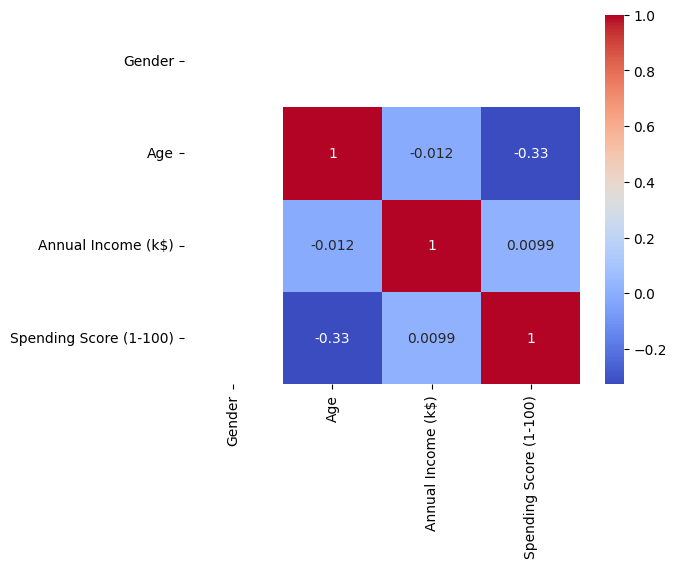

In [ ]:
sns.heatmap(df.corr(),annot = True,cmap= 'coolwarm')

**clustering - Univariate , Bivariate , Multibivariate**

In [96]:
clustering1= KMeans(n_clusters= 5)

In [97]:
clustering1.fit(df[["Annual Income (k$)"]])

KMeans(n_clusters=5)

In [98]:
clustering1.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [99]:
df['Income Cluster']= clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,1,19,15,39,3,0
1,2,1,21,15,81,3,3
2,3,0,20,16,6,3,0
3,4,0,23,16,77,3,3
4,5,0,31,17,40,3,0


In [114]:
incomecluster=pd.DataFrame(df['Income Cluster'].value_counts())
incomecluster.columns=['Value Counts']
incomecluster

,Value Counts
Income Cluster,
4,56
2,50
1,42
3,32
0,20


Index(['Value Counts'], dtype='object')

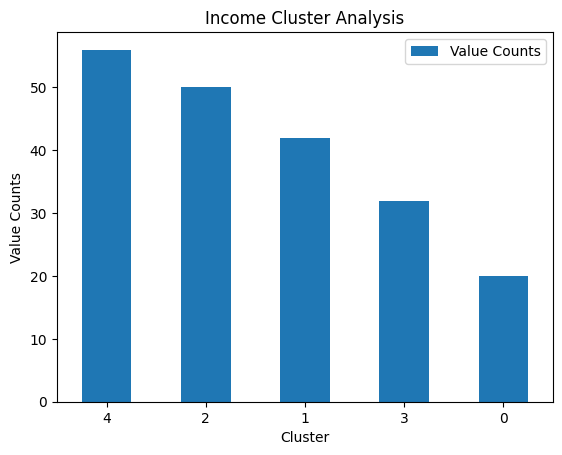

In [120]:
incomecluster.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Value Counts')
plt.title('Income Cluster Analysis')
plt.xticks(rotation=0)
plt.show()


In [21]:
clustering1.inertia_

23517.33093093093

In [95]:
inertia_scores=[]
for i in range(1,11):
  kmeans= KMeans(n_clusters=i)
  kmeans.fit(df[['Annual Income (k$)']])
  inertia_scores.append(kmeans.inertia_)

In [23]:
inertia_scores

[137277.28000000006,
 48660.888888888876,
 23517.33093093093,
 13278.112713472483,
 8481.49619047619,
 5050.9047619047615,
 3989.608946608945,
 2857.441697191697,
 2168.4787157287165,
 1765.9476190476198]

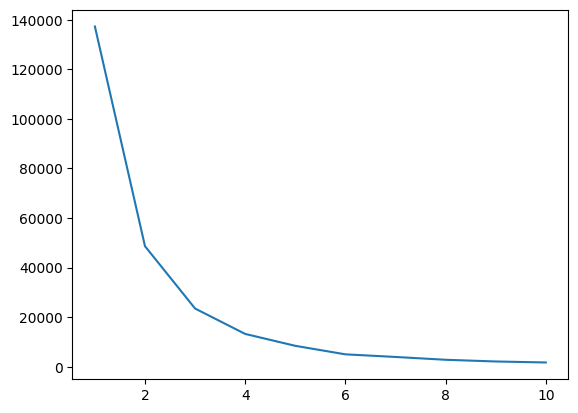

In [24]:
plt.plot(range(1,11),inertia_scores)

In [25]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [28]:
df.groupby('Income Cluster')[[ 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.500000,33.486486,50.229730
1,38.722222,67.088889,50.000000
2,37.833333,99.888889,50.638889


**bivariate clustering**

In [121]:
clustering2= KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)',
       'Spending Score (1-100)']])
clustering2.labels_
df['Spending and Income Cluster']= clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,1,19,15,39,3,2
1,2,1,21,15,81,3,0
2,3,0,20,16,6,3,2
3,4,0,23,16,77,3,0
4,5,0,31,17,40,3,2


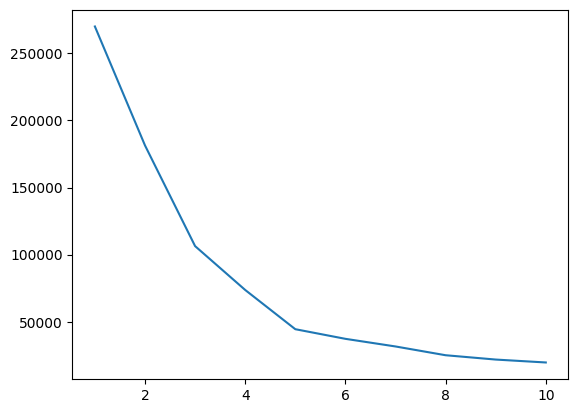

In [122]:
inertia_scores2=[]
for i in range(1,11):
  kmeans2= KMeans(n_clusters=i)
  kmeans2.fit(df[['Annual Income (k$)',
       'Spending Score (1-100)']])
  inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),inertia_scores2)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

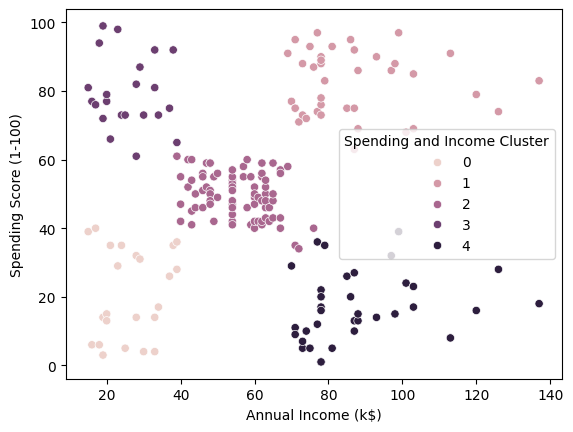

In [38]:
sns.scatterplot(data = df, x='Annual Income (k$)',y = 'Spending Score (1-100)',hue='Spending and Income Cluster'  )

,x,y
0,26.304348,20.913043
1,86.538462,82.128205
2,55.296296,49.518519
3,25.727273,79.363636
4,88.200000,17.114286


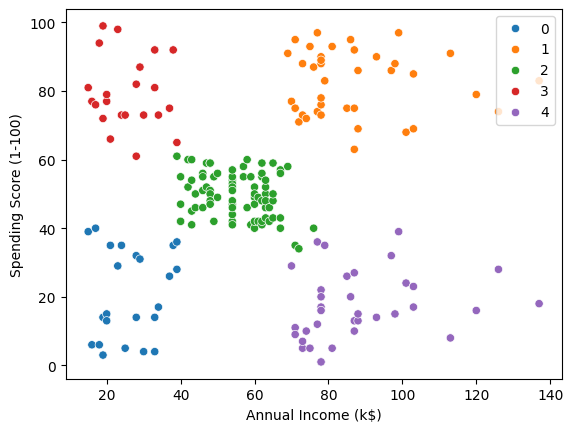

In [65]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Spending and Income Cluster',palette ='tab10')
plt.legend(loc='upper right')
plt.show()

In [67]:
center = pd.DataFrame(clustering2.cluster_centers_)
center.columns= ['x','y']
center

,x,y
0,26.304348,20.913043
1,86.538462,82.128205
2,55.296296,49.518519
3,25.727273,79.363636
4,88.200000,17.114286


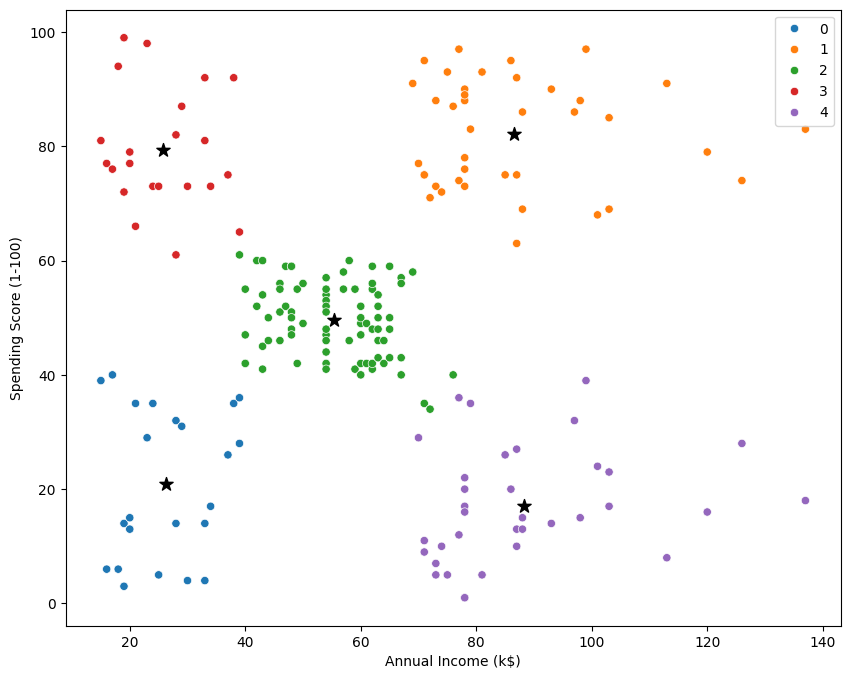

In [66]:
plt.figure(figsize=(10,8))
plt.scatter(x=center['x'],y=center['y'],s=100,c='black',marker="*")
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Spending and Income Cluster',palette ='tab10')
plt.legend(loc='upper right')
plt.show()


In [72]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize = 'index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.608696,0.391304
1,0.538462,0.461538
2,0.592593,0.407407
3,0.590909,0.409091
4,0.457143,0.542857


In [73]:
df.groupby('Spending and Income Cluster')[[ 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,45.217391,26.304348,20.913043
1,32.692308,86.538462,82.128205
2,42.716049,55.296296,49.518519
3,25.272727,25.727273,79.363636
4,41.114286,88.200000,17.114286


#multivariate clustering

In [74]:
from sklearn.preprocessing import StandardScaler


In [75]:
scale = StandardScaler(

)

In [81]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,1,19,15,39,0,0
1,2,1,21,15,81,0,3
2,3,0,20,16,6,0,0
3,4,0,23,16,77,0,3
4,5,0,31,17,40,0,0


In [80]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [83]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster'],
      dtype='object')

In [85]:
dff= df[['Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]
dff.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [90]:
dff= pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


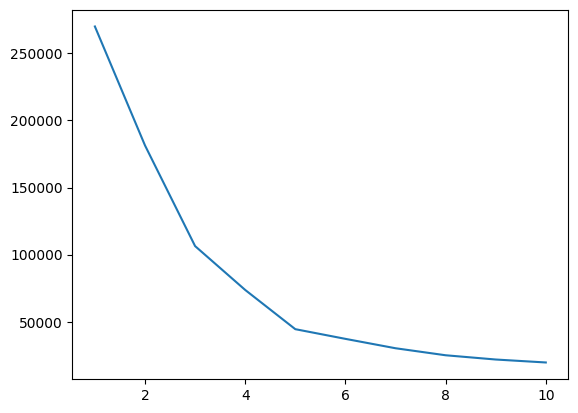

In [91]:
inertia_scores3=[]
for i in range(1,11):
  kmeans3= KMeans(n_clusters=i)
  kmeans3.fit(dff)
  inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),inertia_scores2)

In [93]:
df.to_csv('clustering.csv')